In [2]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = '/Users/rj/Fellow-CERN/SAD/ATF2/ultralow/tuning/'
os.chdir(workdir)
import scipy;
from scipy.integrate import quad, dblquad
import ipywidgets

from matplotlib.ticker import AutoMinorLocator
import os
import glob

import scipy.integrate as integrate
import scipy.special as special
import scipy.optimize

In [36]:
import scipy.integrate as integrate
import scipy.special as special
# L relative distance between two element
# f1, f2 are the lower and upper frequency for integration (with in 0.1-50 Hz)
# PSD parameters taken from B. Bolzon PAC09 paper
# old, wrong
def amp_fast0(L, fmin, fmax):
    f1 = 0.2; f2 = 2.9; f3 = 10.4; # Hz
    w1 = 2*pi*f1; w2 = 2*pi*f2; w3 = 2*pi*f3;
    a1 = 1e-13; a2 = 6e-15; a3 = 2.6e-17; # m^2/Hz
    d1 = 1.1; d2 = 3.6; d3 = 2.0
    v1 = 1000; v2 = 300; v3 = 250; # m/s
    res1 = integrate.quad(lambda f: 2*(a1/(1+(d1*(2*pi*f-w1)/w1)**4))*(1-special.jv(0,2*pi*f*L/v1)), fmin, fmax)
    res2 = integrate.quad(lambda f: 2*(a2/(1+(d2*(2*pi*f-w2)/w2)**4))*(1-special.jv(0,2*pi*f*L/v2)), fmin, fmax)
    res3 = integrate.quad(lambda f: 2*(a3/(1+(d3*(2*pi*f-w3)/w3)**4))*(1-special.jv(0,2*pi*f*L/v3)), fmin, fmax)
    return sqrt(res1[0]+res2[0]+res3[0])

# new
def amp_fast(L, fmin, fmax):
    f1 = 0.2; f2 = 2.9; f3 = 10.4; # Hz
    w1 = 2*pi*f1; w2 = 2*pi*f2; w3 = 2*pi*f3;
    a1 = 1e-13; a2 = 6e-15; a3 = 2.6e-17; # m^2/Hz
    d1 = 1.1; d2 = 3.6; d3 = 2.0
    v1 = 1000; v2 = 300; v3 = 250; # m/s
    def func(f):
        return sqrt(2*(a1/(1+(d1*(2*pi*f-w1)/w1)**4))*(1-special.jv(0,2*pi*f*L/v1))+2*(a2/(1+(d2*(2*pi*f-w2)/w2)**4))*(1-special.jv(0,2*pi*f*L/v2))+2*(a3/(1+(d3*(2*pi*f-w3)/w3)**4))*(1-special.jv(0,2*pi*f*L/v3)))
    res1 = integrate.quad(lambda f: func(f), fmin, fmax)
    return res1[0]   

# export an array of wave-like GM amplitude
def amp_fast_array(L, fn):    
    fw = open(fn, 'a+')
    fw.write('%18.7f\t'%L)
    f=np.logspace(-1, log10(50), 50)
    w0 = []
    amp = []
    for i in range(len(f)-1):
        w0.append(np.mean([f[i], f[i+1]]))
        amp.append(amp_fast(L, f[i], f[i+1]))
        
    for i in range(len(amp)):
        fw.write('%18.7e\t'%amp[i])
    fw.write('\n')
    fw.close()

In [40]:
def PSD_abs(f):
    f1 = 0.2; f2 = 2.9; f3 = 10.4; # Hz
    w1 = 2*pi*f1; w2 = 2*pi*f2; w3 = 2*pi*f3;
    a1 = 1e-13; a2 = 6e-15; a3 = 2.6e-17; # m^2/Hz
    d1 = 1.1; d2 = 3.6; d3 = 2.0    
    return (a1/(1+(d1*(2*pi*f-w1)/w1**2)**4))+(a2/(1+(d2*(2*pi*f-w2)/w2**2)**4))+(a3/(1+(d3*(2*pi*f-w3)/w3**2)**4))

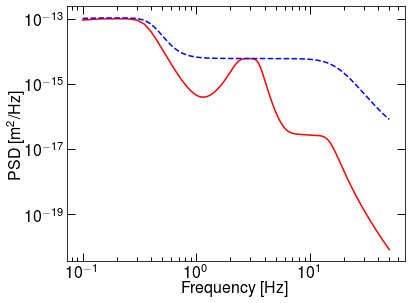

In [41]:
freq=linspace(0.1, 50, 1000)
pow_abs2= PSD_abs(freq)

fig=plt.figure()
plt.plot(freq, pow_abs)
plt.plot(freq, pow_abs2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'PSD [m$^2$/Hz]')

fig.tight_layout()
plt.show()

In [24]:
dat0=loadtxt('./local/data/BesselJ_0_test.dat')
i, Jv0_sad=transpose(dat0)

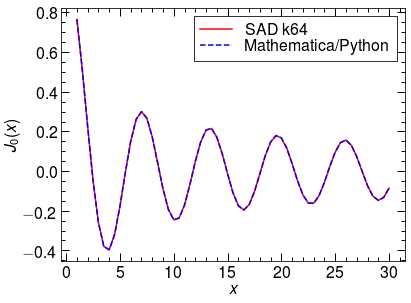

In [25]:
fig=plt.figure()
plt.plot(i, Jv0_sad, label='SAD k64')
plt.plot(i, special.jv(0, i), label='Mathematica/Python')
plt.xlabel(r'$x$')
plt.ylabel(r'$J_0(x)$')
plt.legend(loc='best')

fig.tight_layout()
plt.show()
#fig.savefig('./local/figure/Test_BesselJ_ZeroOrder.pdf')

In [55]:
?array